# Importing Tools:

In [1]:
# Directory Tools:
import os
from collections import Counter
# Asthetic Tools:
from IPython.display import display # Print tables with better formatting (> print)
import warnings
# Data Exploration Tools:
import pandas as pd
import numpy as np
# Data Visualization Tools:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import seaborn as sns
# NLP tools:
import nltk
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.stem import WordNetLemmatizer # Lemmatization Tools
from nltk.collocations import * #Bigrams/Trigrams
from nltk.corpus import wordnet as wn # Word Disambiguating
from nltk.wsd import lesk # Word Disambiguating
import re # To split text
from nltk import word_tokenize
from nltk.corpus import stopwords # For stop words
from string import punctuation # Punction list of stop words
from  nltk import FreqDist
# Machine Learning
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import ShuffleSplit
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
import xgboost as xgb
from sklearn import metrics
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report

# Getting Directory:

In [1]:
import os
os.getcwd()
os.listdir('/home/javarrm')

['.bash_logout',
 '.bash_profile',
 '.bashrc',
 '.kshrc',
 '.mozilla',
 '.ssh',
 '.local',
 'Untitled.ipynb',
 '.ipynb_checkpoints',
 '.ipython',
 '.config',
 '.cache',
 '.conda',
 'Untitled1.ipynb',
 'Untitled2.ipynb',
 '.bash_history',
 '.jupyter',
 'Untitled3.ipynb',
 'winemag-data_first150k.csv',
 'Wine Reviews.ipynb']

In [7]:
nltk.download()

NLTK Downloader
---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> d

Download which package (l=list; x=cancel)?
  Identifier> l
Packages:
  [ ] abc................. Australian Broadcasting Commission 2006
  [ ] alpino.............. Alpino Dutch Treebank
  [ ] averaged_perceptron_tagger Averaged Perceptron Tagger
  [ ] averaged_perceptron_tagger_ru Averaged Perceptron Tagger (Russian)
  [ ] basque_grammars..... Grammars for Basque
  [ ] biocreative_ppi..... BioCreAtIvE (Critical Assessment of Information
                           Extraction Systems in Biology)
  [ ] bllip_wsj_no_aux.... BLLIP Parser: WSJ Model
  [ ] book_grammars....... Grammars from NLTK Book
  [ ] brown............... Brown Corpus
  [ ] brown_tei........... Brown Corpus (TEI XML Version)
  [ ] cess_cat............ CESS-CAT Treebank
  [

       | Downloading package chat80 to /home/javarrm/nltk_data...
       |   Unzipping corpora/chat80.zip.
       | Downloading package city_database to
       |     /home/javarrm/nltk_data...
       |   Unzipping corpora/city_database.zip.
       | Downloading package cmudict to /home/javarrm/nltk_data...
       |   Unzipping corpora/cmudict.zip.
       | Downloading package comparative_sentences to
       |     /home/javarrm/nltk_data...
       |   Unzipping corpora/comparative_sentences.zip.
       | Downloading package comtrans to /home/javarrm/nltk_data...
       | Downloading package conll2000 to /home/javarrm/nltk_data...
       |   Unzipping corpora/conll2000.zip.
       | Downloading package conll2002 to /home/javarrm/nltk_data...
       |   Unzipping corpora/conll2002.zip.
       | Downloading package conll2007 to /home/javarrm/nltk_data...
       | Downloading package crubadan to /home/javarrm/nltk_data...
       |   Unzipping corpora/crubadan.zip.
       | Downloading packa

       |   Unzipping taggers/maxent_treebank_pos_tagger.zip.
       | Downloading package universal_tagset to
       |     /home/javarrm/nltk_data...
       |   Unzipping taggers/universal_tagset.zip.
       | Downloading package maxent_ne_chunker to
       |     /home/javarrm/nltk_data...
       |   Unzipping chunkers/maxent_ne_chunker.zip.
       | Downloading package punkt to /home/javarrm/nltk_data...
       |   Unzipping tokenizers/punkt.zip.
       | Downloading package book_grammars to
       |     /home/javarrm/nltk_data...
       |   Unzipping grammars/book_grammars.zip.
       | Downloading package sample_grammars to
       |     /home/javarrm/nltk_data...
       |   Unzipping grammars/sample_grammars.zip.
       | Downloading package spanish_grammars to
       |     /home/javarrm/nltk_data...
       |   Unzipping grammars/spanish_grammars.zip.
       | Downloading package basque_grammars to
       |     /home/javarrm/nltk_data...
       |   Unzipping grammars/basque_grammars

True

# Data Exploration:

### Importing Data:

In [2]:
data = pd.read_csv('winemag-data_first150k.csv')

### Inspecting Data:

In [3]:
# Viewing Data Information
print('Column Names')
display(data.columns)
print('Top 5')
display(data.head())
print('Bottom 5')
display(data.tail())
print('Data Information')
display(data.describe(include='all'))
display(data.info())

Column Names


Index(['Unnamed: 0', 'country', 'description', 'designation', 'points',
       'price', 'province', 'region_1', 'region_2', 'variety', 'winery'],
      dtype='object')

Top 5


,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,variety,winery
0,0,US,This tremendous 100% varietal wine hails from ...,Martha's Vineyard,96,235.0,California,Napa Valley,Napa,Cabernet Sauvignon,Heitz
1,1,Spain,"Ripe aromas of fig, blackberry and cassis are ...",Carodorum Selección Especial Reserva,96,110.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodríguez
2,2,US,Mac Watson honors the memory of a wine once ma...,Special Selected Late Harvest,96,90.0,California,Knights Valley,Sonoma,Sauvignon Blanc,Macauley
3,3,US,"This spent 20 months in 30% new French oak, an...",Reserve,96,65.0,Oregon,Willamette Valley,Willamette Valley,Pinot Noir,Ponzi
4,4,France,"This is the top wine from La Bégude, named aft...",La Brûlade,95,66.0,Provence,Bandol,NaN,Provence red blend,Domaine de la Bégude


Bottom 5


,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,variety,winery
150925,150925,Italy,Many people feel Fiano represents southern Ita...,NaN,91,20.0,Southern Italy,Fiano di Avellino,NaN,White Blend,Feudi di San Gregorio
150926,150926,France,"Offers an intriguing nose with ginger, lime an...",Cuvée Prestige,91,27.0,Champagne,Champagne,NaN,Champagne Blend,H.Germain
150927,150927,Italy,This classic example comes from a cru vineyard...,Terre di Dora,91,20.0,Southern Italy,Fiano di Avellino,NaN,White Blend,Terredora
150928,150928,France,"A perfect salmon shade, with scents of peaches...",Grand Brut Rosé,90,52.0,Champagne,Champagne,NaN,Champagne Blend,Gosset
150929,150929,Italy,More Pinot Grigios should taste like this. A r...,NaN,90,15.0,Northeastern Italy,Alto Adige,NaN,Pinot Grigio,Alois Lageder


Data Information


,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,variety,winery
count,150930.000000,150925,150930,105195,150930.000000,137235.000000,150925,125870,60953,150930,150930
unique,NaN,48,97821,30621,NaN,NaN,455,1236,18,632,14810
top,NaN,US,"92-94 Barrel sample. A rounded wine, its tanni...",Reserve,NaN,NaN,California,Napa Valley,Central Coast,Chardonnay,Williams Selyem
freq,NaN,62397,6,2752,NaN,NaN,44508,6209,13057,14482,374
mean,75464.500000,NaN,NaN,NaN,87.888418,33.131482,NaN,NaN,NaN,NaN,NaN
std,43569.882402,NaN,NaN,NaN,3.222392,36.322536,NaN,NaN,NaN,NaN,NaN
min,0.000000,NaN,NaN,NaN,80.000000,4.000000,NaN,NaN,NaN,NaN,NaN
25%,37732.250000,NaN,NaN,NaN,86.000000,16.000000,NaN,NaN,NaN,NaN,NaN
50%,75464.500000,NaN,NaN,NaN,88.000000,24.000000,NaN,NaN,NaN,NaN,NaN
75%,113196.750000,NaN,NaN,NaN,90.000000,40.000000,NaN,NaN,NaN,NaN,NaN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150930 entries, 0 to 150929
Data columns (total 11 columns):
Unnamed: 0     150930 non-null int64
country        150925 non-null object
description    150930 non-null object
designation    105195 non-null object
points         150930 non-null int64
price          137235 non-null float64
province       150925 non-null object
region_1       125870 non-null object
region_2       60953 non-null object
variety        150930 non-null object
winery         150930 non-null object
dtypes: float64(1), int64(2), object(8)
memory usage: 12.7+ MB


None

There's an unnecessary 'unnamed' column. 

Missing Data Columns:
- country
- designation
- points
- price
- region_1
- region_2
- province, 

In [4]:
# Find potential Categorical values
for i in list(data.columns):
    print("{}: {}".format(i, len(data.loc[:, i].unique())))

Unnamed: 0: 150930
country: 49
description: 97821
designation: 30622
points: 21
price: 358
province: 456
region_1: 1237
region_2: 19
variety: 632
winery: 14810


In [5]:
# Converting data to correct types
del data['Unnamed: 0']
catcols = ['country', 'province', 'region_1', \
           'region_2','variety']
for cols in catcols:
    data[cols] = data[cols].astype('category')

# Language Processing

In [6]:
bows = word_tokenize(data.description[1])
for bow in bows:
    bow = re.sub('[^a-zA-Z0-9]', '', bow).lower().strip() # Take out special characters in words     
    lem_bow = lemmatizer.lemmatize(bow) # Word Lemmatizing
    lem_bow_list.append(lem_bow)
filtered_bow = [lembow for lembow in lem_bow_list]
display(filtered_bow = np.zeros(len(data)))

NameError: name 'lemmatizer' is not defined

In [8]:
# Preprocessing Set up:
stop_words = set(stopwords.words('english') + list(punctuation) + [' ', ''])
fresh_words = {}
lemmatizer = WordNetLemmatizer()
lem_bow_list = []
alls = []
freq_bow = {}
vect_setup = {}
# Body: Tokenize/Lemmatize
for d in range(len(data)):
    bows = word_tokenize(data.description[d])
    lem_bow_list = []
    for bow in bows:
        bow = re.sub('[^a-zA-Z0-9]', '', bow).lower().strip() # Take out special characters in words     
        lem_bow = lemmatizer.lemmatize(bow) # Word Lemmatizing
        lem_bow_list.append(lem_bow)
    filt_bow = [lembow for lembow in lem_bow_list if lembow not in stop_words]
    alls.extend(filt_bow)
    vect_setup[d] = filt_bow
    freq_bow[d] = Counter(FreqDist(filt_bow))

In [55]:
vectorizer = TfidfVectorizer(min_df=1, stop_words = stop_words) #Initiating TfidfVectorizer
matrix = vectorizer.fit_transform(data['description'])
idf = pd.DataFrame(vectorizer.idf_)
a = vectorizer.get_feature_names()
c = pd.DataFrame(matrix.toarray()[0])
e = pd.DataFrame(matrix.toarray())
e.columns = a
data_wvect = pd.concat([data, e], axis=1)
#data_wcountvect = pd.concat([data_wcount, e], axis=1)
#word_set = pd.DataFrame.from_dict(filtered_bow).transpose()
#data_wcount = pd.concat([data, word_set], axis=1, join='inner')
display(data_wvect)

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,variety,...,zings,zingy,zins,zip,zippy,zone,zotzenberg,çalkarasi,émilion,öküzgözü
0,0,US,This tremendous 100% varietal wine hails from ...,Martha's Vineyard,96,235.0,California,Napa Valley,Napa,Cabernet Sauvignon,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,Spain,"Ripe aromas of fig, blackberry and cassis are ...",Carodorum Selección Especial Reserva,96,110.0,Northern Spain,Toro,NaN,Tinta de Toro,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2,US,Mac Watson honors the memory of a wine once ma...,Special Selected Late Harvest,96,90.0,California,Knights Valley,Sonoma,Sauvignon Blanc,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3,US,"This spent 20 months in 30% new French oak, an...",Reserve,96,65.0,Oregon,Willamette Valley,Willamette Valley,Pinot Noir,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,4,France,"This is the top wine from La Bégude, named aft...",La Brûlade,95,66.0,Provence,Bandol,NaN,Provence red blend,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,5,Spain,"Deep, dense and pure from the opening bell, th...",Numanthia,95,73.0,Northern Spain,Toro,NaN,Tinta de Toro,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,6,Spain,Slightly gritty black-fruit aromas include a s...,San Román,95,65.0,Northern Spain,Toro,NaN,Tinta de Toro,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,7,Spain,Lush cedary black-fruit aromas are luxe and of...,Carodorum Único Crianza,95,110.0,Northern Spain,Toro,NaN,Tinta de Toro,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,8,US,This re-named vineyard was formerly bottled as...,Silice,95,65.0,Oregon,Chehalem Mountains,Willamette Valley,Pinot Noir,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,9,US,The producer sources from two blocks of the vi...,Gap's Crown Vineyard,95,60.0,California,Sonoma Coast,Sonoma,Pinot Noir,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [9]:
vect_data = vect_setup
for i in range(len(vect_setup)):
    vect_data[i] = " ".join(vect_setup[i])
display(vect_data)

{0: 'tremendous 100 varietal wine hail oakville wa aged three year oak juicy redcherry fruit compelling hint caramel greet palate framed elegant fine tannin subtle minty tone background balanced rewarding start finish ha year ahead develop nuance enjoy 20222030',
 1: 'ripe aroma fig blackberry cassis softened sweetened slathering oaky chocolate vanilla full layered intense cushioned palate rich flavor chocolaty black fruit baking spice toasty everlasting finish heady ideally balanced drink 2023',
 2: 'mac watson honor memory wine made mother tremendously delicious balanced complex botrytised white dark gold color layer toasted hazelnut pear compote orange peel flavor reveling succulence 122 gl residual sugar',
 3: 'spent 20 month 30 new french oak incorporates fruit ponzi aurora abetina madrona vineyard among others aromatic dense toasty deftly blend aroma flavor toast cigar box blackberry black cherry coffee graphite tannin polished fine sheen frame finish loaded dark chocolate espres

In [18]:
vectorizer = TfidfVectorizer(min_df=1, stop_words = stop_words) #Initiating TfidfVectorizer
vectorizer.fit_transform(vect_data.values())
#feat_names = vectorizer.get_feature_names()
#vect_setup.columns = feat_names
#data_wvect = pd.concat([data, vect_setup], axis=1, join='inner')

MemoryError: 

,Freq
Bigram,
"(black, cherry)",7390
"(fruit, flavor)",6792
"(wine, ha)",6016
"(black, fruit)",4905
"(cabernet, sauvignon)",4778


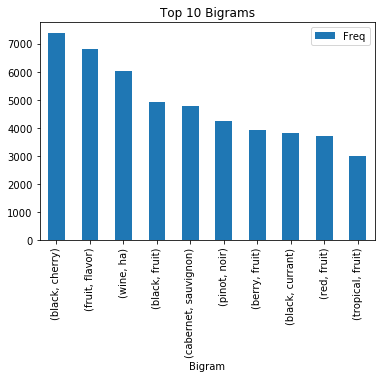

In [20]:
# Bigram List (Most frequent Bigrams)
bigram_measure = nltk.collocations.BigramAssocMeasures()
finder = BigramCollocationFinder.from_words(alls)
ngram = list(finder.ngram_fd.items())
bigram = pd.DataFrame(ngram).sort_values(1, ascending=False).rename(columns={0:'Bigram',1:'Freq'}).set_index('Bigram')
display(bigram.head())
bigram.iloc[:10].plot(kind='bar')
plt.title('Top 10 Bigrams')
plt.show()

,Freq
Trigram,
"(blackberry, black, currant)",969
"(new, french, oak)",702
"(blend, cabernet, sauvignon)",675
"(cherry, red, currant)",646
"(black, cherry, fruit)",632


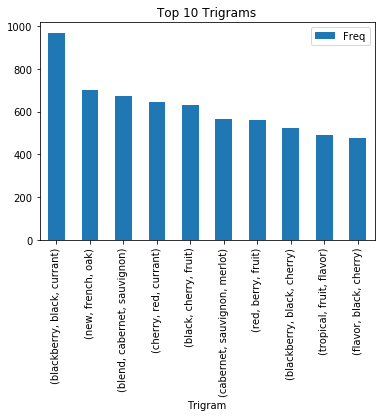

In [19]:
# Trigram List (Most Frequent Trigrams)
trigram_measure = nltk.collocations.TrigramAssocMeasures()
finder = TrigramCollocationFinder.from_words(alls, 3)
ngram = list(finder.ngram_fd.items())
trigram = pd.DataFrame(ngram).sort_values(1, ascending=False).rename(columns={0:'Trigram',1:'Freq'}).set_index('Trigram')
display(trigram.head())
trigram.iloc[:10].plot(kind='bar')
plt.title('Top 10 Trigrams')
plt.show()